# Vader Sentiment Analysis of Tweets Mentioning Trump During Charlottesville Protests (August 12 -15, 2017)

For more information about how Vader works behind the scenes see here: https://github.com/cjhutto/vaderSentiment

#### Load Packages

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

#### Shorten SentimentIntensityAnalyzer Function

In [21]:
vader = SentimentIntensityAnalyzer()

#### Read the 'text' column in the .csv file of 244,000 tweets and turn it into a dataframe using 'Pandas' package

In [22]:
df = pd.read_csv("trumpCvilleAug12-15.csv", usecols=['text'])

#### Create labels for different sentiment values and start the count for each value at zero

In [23]:
res = {"-.9":0, "-.8":0, "-.7":0, "-.6":0, "-.5":0, "-.4":0, "-.3":0, "-.2":0, "-.1":0, "0":0, ".1":0, ".2":0, ".3":0, ".4":0, ".5":0, ".6":0, ".7":0, ".8":0, ".9":0}

#### Go through and apply the Vader sentiment analyzer to all 181k+ tweets and count them

In [24]:
for index, row in df.iterrows():
    vs = vader.polarity_scores(df['text'][index])
    if vs["compound"]==0.0:
        res["0"] +=1
    elif 0.00001 < vs["compound"] < 0.19999:
        res[".1"] +=1
    elif 0.2 < vs["compound"] < 0.29999:
        res[".2"] +=1
    elif 0.3 < vs["compound"] < 0.39999:
        res[".3"] +=1
    elif 0.4 < vs["compound"] < 0.49999:
        res[".4"] +=1
    elif 0.5 < vs["compound"] < 0.59999:
        res[".5"] +=1
    elif 0.6 < vs["compound"] < 0.69999:
        res[".6"] +=1
    elif 0.7 < vs["compound"] < 0.79999:
        res[".7"] +=1
    elif 0.8 < vs["compound"] < 0.89999:
        res[".8"] +=1
    elif 0.9 < vs["compound"] < 0.99999:
        res[".9"] +=1
    elif -0.19999 < vs["compound"] < -0.00001:
        res["-.1"] +=1
    elif -0.29999 < vs["compound"] < -0.2:
        res["-.2"] +=1
    elif -0.39999 < vs["compound"] < -0.3:
        res["-.3"] +=1
    elif -0.49999 < vs["compound"] < -0.4:
        res["-.4"] +=1
    elif -0.59999 < vs["compound"] < -0.5:
        res["-.5"] +=1
    elif -0.69999 < vs["compound"] < -0.6:
        res["-.6"] +=1
    elif -0.79999 < vs["compound"] < -0.7:
        res["-.7"] +=1
    elif -0.89999 < vs["compound"] < -0.8:
        res["-.8"] +=1
    else:
        res["-.9"] +=1
        
print(res)


{'-.9': 300, '-.8': 539, '-.7': 954, '-.6': 973, '-.5': 946, '-.4': 796, '-.3': 505, '-.2': 1491, '-.1': 526, '0': 5327, '.1': 438, '.2': 291, '.3': 469, '.4': 1095, '.5': 386, '.6': 853, '.7': 477, '.8': 107, '.9': 15}


#### Plot the results in a bar graph

   score  count
0    -.9    300
1    -.8    539
2    -.7    954
3    -.6    973
4    -.5    946
5    -.4    796
6    -.3    505
7    -.2   1491
8    -.1    526
9      0   5327
10    .1    438
11    .2    291
12    .3    469
13    .4   1095
14    .5    386
15    .6    853
16    .7    477
17    .8    107
18    .9     15


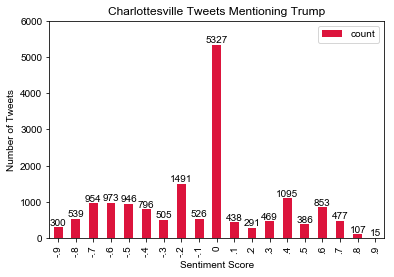

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter



#plt.bar(range(len(res)), res.values(), align='center', color = ['C3'])
#plt.xticks(range(len(res)), res.keys())
#plt.xlabel("Sentiment Categories")
#plt.ylabel("Number of Tweets")
#plt.title("Charlottesville Tweets")
#plt.ylim(0,8000)
#plt.text(0.5, 1,x, horizontalalignment='center', verticalalignment='center', alpha =0.5)
    
             
#plt.show()
%matplotlib inline
cres = Counter(res)
resdf = pd.DataFrame.from_dict(cres, orient='index').reset_index()
resdf = resdf.rename(columns={'index':'score', 0:'count'})
print(resdf)


fig = resdf.plot(x=resdf['score'],kind='bar', align = 'center', color =['crimson'])
fig.set_ylabel('Number of Tweets')
fig.set_xlabel('Sentiment Score')
fig.set_title('Charlottesville Tweets Mentioning Trump')
fig.set_ylim(0,6000)

rects = fig.patches

# Now make some labels
labels = resdf['count']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    fig.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('CvilleVADER.png', format='png', dpi=300, bbox_inches='tight')


plt.show()


Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.